<a href="https://www.kaggle.com/code/matjes/ais22-w03-data-integration?scriptVersionId=95921407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Analytical Information Systems*

# Worksheet 3 - Data Integration

Matthias Griebel<br>
Lehrstuhl für Wirtschaftsinformatik und Business Analytics

SS 2022

***
# Table of Contents

* [1. Recap: Data Integration](#data_int)
    * [1.1. Data Warehousing: ETL](#etl)
    * [1.2. Data Extraction](#extract)
    * [1.3. Data Transformation](#transform)
    * [1.4. Data Loading](#load)
* [2. Exercises](#exercises)
    * [2.1. Data Extraction](#e_extract)
    * [2.2. Data Transformation](#e_transform)
    * [2.3. Data Loading](#e_load)
    * [2.4. Exam Questions](#exam_questions)
    
*** 

## 1. Recap Data Integration
<a id="data_int"></a>

#### Definition Data Integration [Gartner IT Glossary](https://www.gartner.com/it-glossary/data-integration-tools/)

*'[...] __data integration__ comprises the practices, architectural techniques and tools for achieving the __consistent access and delivery__ of data across the spectrum of data subject areas and data structure types in the enterprise to meet the data consumption requirements of all applications and business processes.'*

#### How do get the data ready for analysis?

<img src="https://github.com/matjesg/AIS_2019/raw/master/notebooks/images/02/BIStack_ds.png" width="500">

Identify relevant databases

- External and internal data sources comprise 
    - relational and non-relational databases, 
    - XML, JSON
    - flat files (e.g., .csv)
    - and many more<br>
    
### 1.1. Data Warehousing: ETL
<a id="etl"></a>

*from [Wikipedia](https://en.wikipedia.org/wiki/Extract,_transform,_load)*:

"[...] extract, transform, load (ETL) is the general procedure of copying data from one or more sources into a destination system which represents the data differently from the source(s)."
- __Data extraction__ involves extracting data from homogeneous or heterogeneous sources
- __Data transformation__ processes data by data cleansing and transforming them into a proper storage format/structure for the purposes of querying and analysis
- __Data loading__ describes the insertion of data into the final target database such as an operational data store, a data mart, or a data warehouse.

<img src="https://github.com/matjesg/AIS_2019/raw/master/notebooks/images/02/BIStack_etl.png" width="500">


### 1.2. Data Extraction
<a id="extract"></a>

to extract data from homogeneous or heterogeneous sources

<img src="https://readr.tidyverse.org/logo.png" width="100">

- The **readr** package provides a fast and friendly way <br> for reading rectangular data 
    - File formats: .csv, .tsv, and .fwf
    - Part of the core tidyverse
```R
# Example
read_csv("file.csv")
```


- **Packages for other file formats**
    - haven - SPSS, Stata, and SAS files 
    - readxl - excel files (.xls and .xlsx) 
    - DBI - databases
    - jsonlite - json
    - xml2 - XML
    - httr - Web APIs
    - rvest - HTML (Web Scraping)
    
#### Data Import Cheat Sheet

- How to read in flat files 
- Work with the results as tibbles
- Reshape messy data

[Download here](https://github.com/rstudio/cheatsheets/raw/master/data-import.pdf)

### 1.3. Data Transformation
<a id="transform"></a>

Data transformation converts the data into a proper storage format/structure for the purposes of querying and analysis
- Data cleansing 
    - Correct syntactical or semantical defects
- Data harmonization
    - Solving schema heterogeneity 
    - Solving data-level heterogeneity
- Data combination
    - Combine the harmonized data sets
- Data enrichment
    - Calculate frequently required (business) key figures as separate attributes
    
##### Data Cleansing 

__Correction of syntactical or semantical defects__

Depending on the degree of automation in the defect detection and defect correction we distinguish between three classes of defects.<br><br>

| <br>               | Automated Correction         | Manual Correction            |
|--------------------|------------------------------|------------------------------|
| Automated Detection| 1<sup>st</sup> class defects | 2<sup>nd</sup> class defects |
| Manual Detection   | -                            | 3<sup>rd</sup> class defects |


#### 1<sup>st</sup> class deficiencies

Syntactic and semantic deficiencies that are known in advance or can be anticipated.
- Syntactic: format, special characters, …
- Semantic: missing values in operating systems due to planned maintenance, …

→ Deficiencies can be automatically resolved by implementing transformation rules

#### 2<sup>nd</sup> class deficiencies

Deficiencies that can be automatically identified but have to be removed manually

- Syntactic: prior unknown syntactic error are identified for the first time and transferred into transformation rules
- Semantic: deficiencies can be identified by automatic plausibility checks or pattern recognition algorithms

→ Deficiencies are usually due to errors in the data source, corrective action must be taken at the operational source.


#### 3<sup>rd</sup> class deficiencies

Semantic deficiencies that can only be manually identified and resolved.
- Errors in the data set that can only be identified by domain experts

→ Prompt correction of the deficiencies can be supported by software tools (Workflow-Management-Systems)

#### Data Harmonization
##### Solving Schema Heterogeneity

Schemas are created by different people whose states and styles are different
- Same concept, but different names for tables and attributes
    - rating vs classification
- Multiple attributes in first schema relate to a single attribute in the other
    - basePrice and taxRate relate to price
- Tabular organization of schemas can be quite different
    - One table in DB1 vs three tables in DB2
- Coverage and level of details can also differ significantly
    - Daily sales data vs. monthly sales data
    - High-level information (movie name, playtime) vs. detailed meta data (director, genre, rating)
    
##### Solving Data-level  Heterogeneity
Data coming from different sources rarely joins perfectly

Typical reasons include
- Differently coded data
    - identical attribute names and identical meanings but different domains or value ranges (e.g., gender coded as “m / f” or “male / female”)
- Synonyms
    - Attributes that have different names but the same meaning and domain (e.g., “client” or “customer”)
- Homonyms: 
    - Attributes have the same attribute names, but have different meanings (e.g., “partner” = “customer” or “partner” = “supplier”)
    
#### Data Combination

Combine the harmonized data sets into an appropriate format/structure for further analysis.

#### Enrich the data

- Business key figures are calculated and integrated into the data basis as separate attributes
- Example: Calculation of weekly contribution margins at product level and annual contribution margins at store level
- Advantages
    - Calculable response time behavior for later queries based on the advance calculation
    - Guaranteed consistency of the calculated values, since they are only formed once across all applications
    - Establishment of coordinated business management instruments
    
 
### 1.4. Data Loading<a id="load"></a>
__Data loading__ describes the insertion of data into the final target database such as an operational data store, a data mart, or a data warehouse (e.g., AWS Redshift or Apache Hive)

- A __database__ is an organized collection of cleaned and structured data 
- A __Database management system (DBMS)__ allows to store, modify, and extract information from a database MySQL, ORACLE, MS SQL, DB2, MS ACCESS, Informix
    
 
__Working with DBMS: SQL__

SQL (Structured Query Language) is the standard language for accessing and manipulating data in databases and allows retrieving and manipulating data as well as administrative operations

- A typical SQL command
```SQL
	SELECT <column names separated by comma>
    FROM <database table>
	WHERE <condition>
    GROUP BY <column name>
    ORDER BY <column name>
```

__Using differnte query languages in R__

- The *DBI* (Database Interface) package allows communication between R and relational database management systems
    - Using a DBI-compliant interface, the *RSQLite* embeds the SQLite database engine in R
    - SQLite is a public-domain, single-user, very light-weight database engine that implements a decent subset of the SQL 92 standard,
- The packages *dbplyr* (part of the *tidyverse*) is designed to work with database tables as if they were local data frames


<img src="https://github.com/matjesg/AIS_2019/raw/master/notebooks/images/01/aris.png" width="300">

## 2. Exercises<a id="exercises"></a>

### 2.1. Data Extraction<a id="e_extract"></a>

You are provided with a set of operational data from a retail company.

- Transaction data (Comma Delimited Files): 
    - *'transactions_eng.csv'*
    - *'transactions_ger.csv'*
   
- Customer data (Semi-colon Delimited Files)
    - *'customers.csv*
    - *'customers_usa.csv*

- Product data (Excel Files)
    - *'products_convenience.xlsx'*
    - *'products.xlsx*
    
- Load the required packages

In [1]:
library(tidyverse) # includes the readr package
library(readxl) # excel files

# The data is provided in the data_path folder
data_path = '../input/ais21-data/'

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



<span style="color:red">***Your turn***</span>
#### Load the provided files .csv files

- Use `read_csv` for ',' separated values
- Use `read_csv2` for ';' separated values
- Use `read_xlsx` to read excel files
- Use `paste0` to concatenate the `data_url` and the file name

Example:
```R
customers <- read_csv2(paste0(data_path, 'customers.csv'))
```

In [2]:
# Write your code here

<span style="color:red">***Your turn***</span>
#### Get to know the data

Take a look at the data with:
```R
head()
sample_n()
```

In [3]:
# Write your code here 

Understand the rows and columns (observations and variables)
```R
glimpse()
summary()
```

In [4]:
# Write your code here 

### 2.2. Data Tranformation
<a id="e_transform"></a>

<span style="color:red">***Your turn***</span>
#### Resolve 1st class deficiencies

Find the syntactic in the products convenience data sets

- `products_convenience`: look at price and costs
- `customers_usa`: look at the names

In [5]:
# Write your code here 

Implement transformation rules to resolve the deficiencies
- Transformation rules can be implemented as pipes
- You will have to use mutate() in combination with *str_replace()* and/or *str_split()*

In [6]:
# Write your code here 

In [7]:
# Write your code here 

#### Resolve 2<sup>nd</sup> class deficiencies*

- Perform plausibility checks (min, mean, max, …) to identify deficiencies in the product data 


In [8]:
# Write your code here 

In [9]:
# Write your code here 

- Implement transformation rules to resolve the deficiencies. <br> If you identify errors or missing values you can either:
    - Keep the errors / missing values
    - Remove the observations
    - Impute the values

In [10]:
# Write your code here

#### Resolve 3<sup>rd</sup> class deficiencies*

- Find the semantic 3<sup>rd</sup> class deficiencies in the customer data
    - `customer`: Take a closer look at the countries

In [11]:
# Write your code here 

- Resolve the deficiencies

In [12]:
# Write your code here 

#### Data Harmonization - Schema Heterogeneity

Find and harmonize schema heterogeneity in transaction data sets
- Look at the attribute names
- Adjust the transactions_ger to the schema of transactions_eng

In [13]:
# Write your code here

#### Data Harmonization - Data-level Heterogeneity

Find and harmonize data-level heterogeneity in the customer data sets
- Take a closer look to the variables names as well as the variable values
- Adjust the `customers_usa` to the schema of `customers`

In [14]:
# Write your code here 

#### Combine the data

- Combine the harmonised data sets
    - Create three new data sets: `customers`, `transactions`, `products`
    - Use *bind_rows()* for binding multiple data frames by row

In [15]:
# Write your code here

- Join the three data sets into one data final data frame

In [16]:
# Write your code here

#### Enrich the data

Create two new variables:
    - revenue per transaction
    - profit per transaction

In [17]:
# Write your code here 

### 2.3 Data Loading
<a id="e_load"></a>

We’ll first create an in-memory SQLite database. We also need to install the `RSQLite` package.

In [18]:
#install.packages('RSQLite')
con <- DBI::dbConnect(RSQLite::SQLite(), ":memory:")

and copy over our dataset

In [19]:
# only works if 2.3 is solved
# copy_to(con, data_enriched)

Now you can retrieve a table using `tbl()` . Printing it just retrieves the first few rows:

In [20]:
# only works if 2.3 is solved
# db <- tbl(con, "data_enriched")
# db

- (Lazily) generate query

In [21]:
# db %>%
#    filter(payment == 'cash') %>%
#    summarise(MeanAmount = mean(amount, na.rm = TRUE)) -> summary

- See query

In [22]:
# summary %>% show_query()

- Execute query and retrieve results

In [23]:
# summary %>% collect()

<span style="color:red">***Your turn***</span>
#### Analyze the data

Use the database connection to answer the following question:

__How much profit did the company realize in 2017?__

- Generate query

In [24]:
# Write your code here

- See query

In [25]:
# Write your code here 

- Execute query and retrieve results

In [26]:
# Write your code here

### 2.4 Exam Questions <a id="exam_questions"></a>

#### 2.4.1 Exam AIS SS 2018, Question 1 (Data Engineering & Integration, 10 points)

(a) __Getting orders in order__: You are working for a major online retailer who is interested in optimizing internal logistics processes. A key problem in this context is the handling of __orders with a single line item__ vs. __orders with multiple line items__.

The cornerstone of your analysis is an orders table with the following structure:<br>

<left>
    
\begin{array}{cccc}  
\hline
productID & quantity & orderID  \\ 
  \hline
...&...&...\\
\end{array}
    
</left>

i. (1 points) Explain (verbally or in pseudo code) how you would identify the number of orders with a single line item from this data base.

In [27]:
# Toy example for demonstration
order_data = tribble(
     ~productID, ~quantity, ~orderID,
    "Prod1",     2,         "Ord1",
    "Prod2",     3,         "Ord1",
    "Prod3",     4,         "Ord1",
    "Prod2",     5,         "Ord2",
    "Prod1",     2,         "Ord3",
    "Prod3",     1,         "Ord3",
    "Prod3",     1,         "Ord4")

<span style="color:red">***Your turn***</span>

In [28]:
# Write your code here 

i. (2 points) The frontend reporting tool used by the logistics department cannot handle data sets with more than 1 million rows. Yet your order table has many more rows. Recognizing that individual product IDs are not crucial for the logistics process analysis (handling times are determined by the number of products in an order) you are approached to provide ___a compact representation which retains the structure (number of line items) of the order invoices___. Explain how this can be achieved by means of clever aggregation.

<span style="color:red">***Your turn***</span>

In [29]:
# Write your code here

#### 2.4.2 Exam AIS SS 2020, Question 1 (Data Management, Integration and Visualization, Data Integration II , 3 points)

Publishing is a key success factor in academia. To assess academic merits of individual scholars the reputation of journals is of great importance. A lack of standardization of record keeping and journal evaluation renders this task oftentimes hard to automate.

i. (2 points) Name 4 data integration issues when working with the three data tables below.

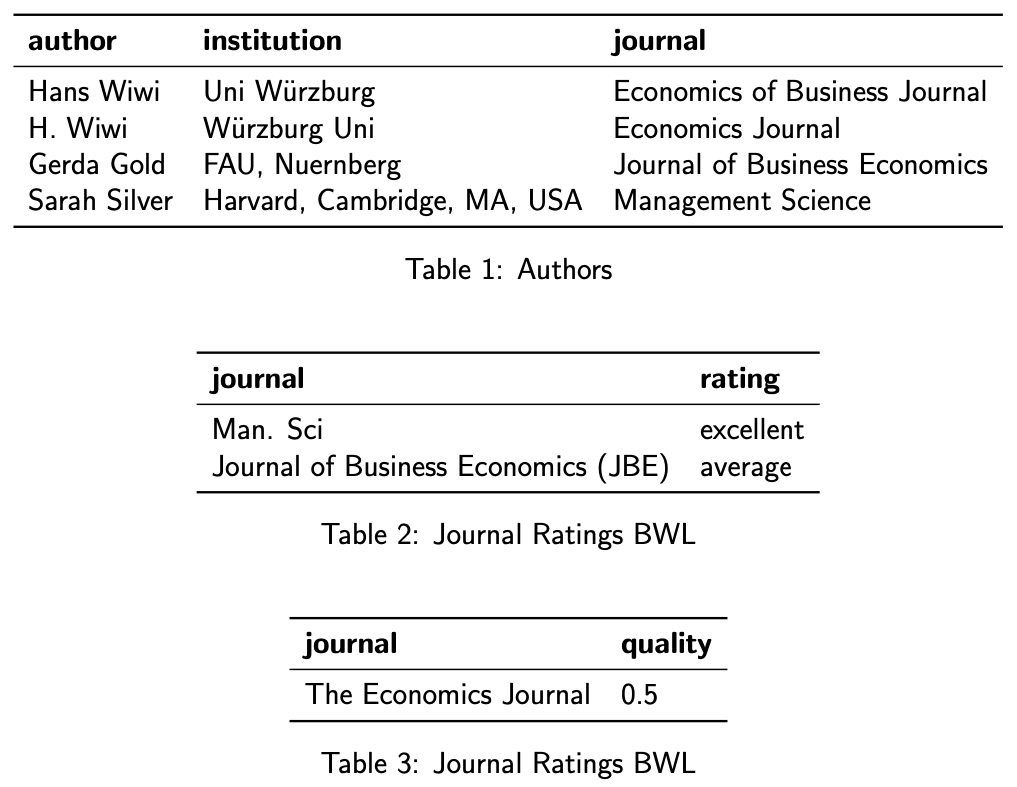

In [30]:
# Write answer here

ii. (1 point) We discussed the Jaccard-Index (intersection over union) as a robust measure for string matching. Select one example each from the data where the Jaccard-Index will perform very well or very badly for instance resolution.

In [31]:
# Write answer here